## Select the data

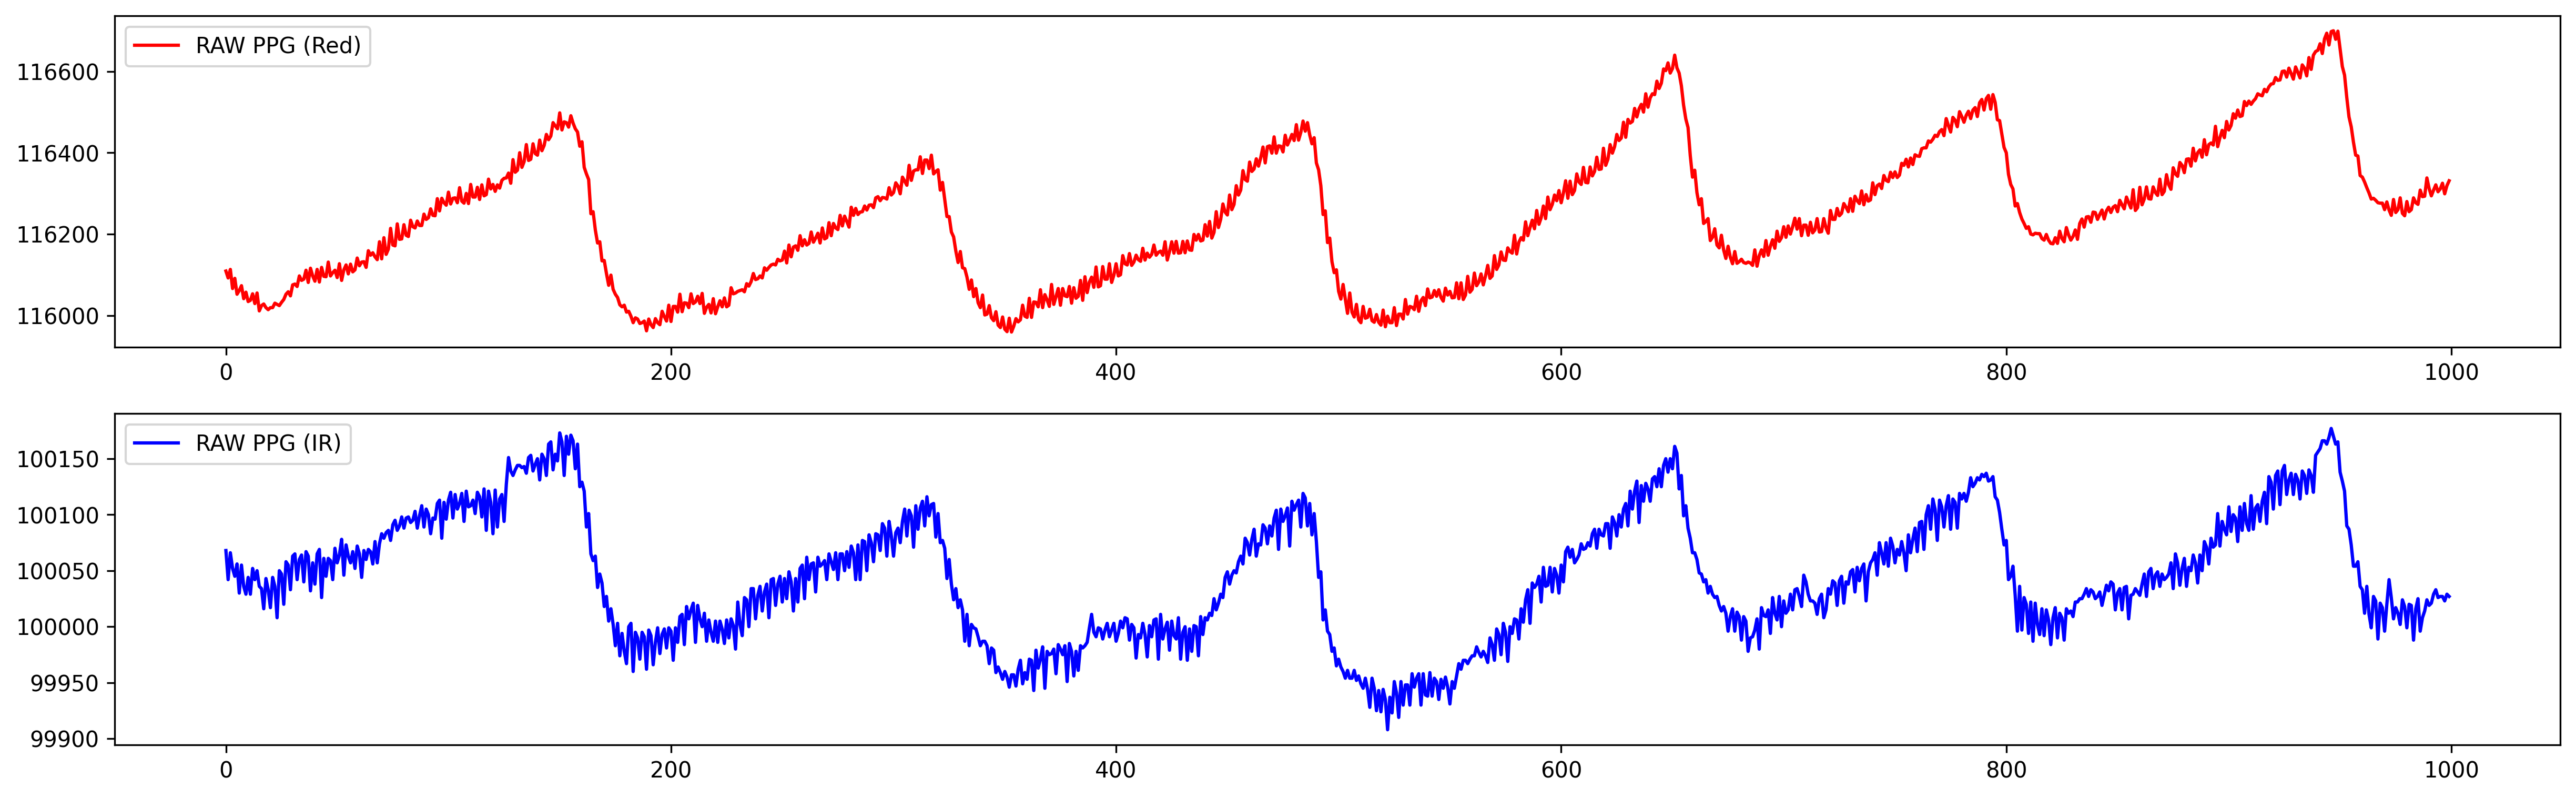

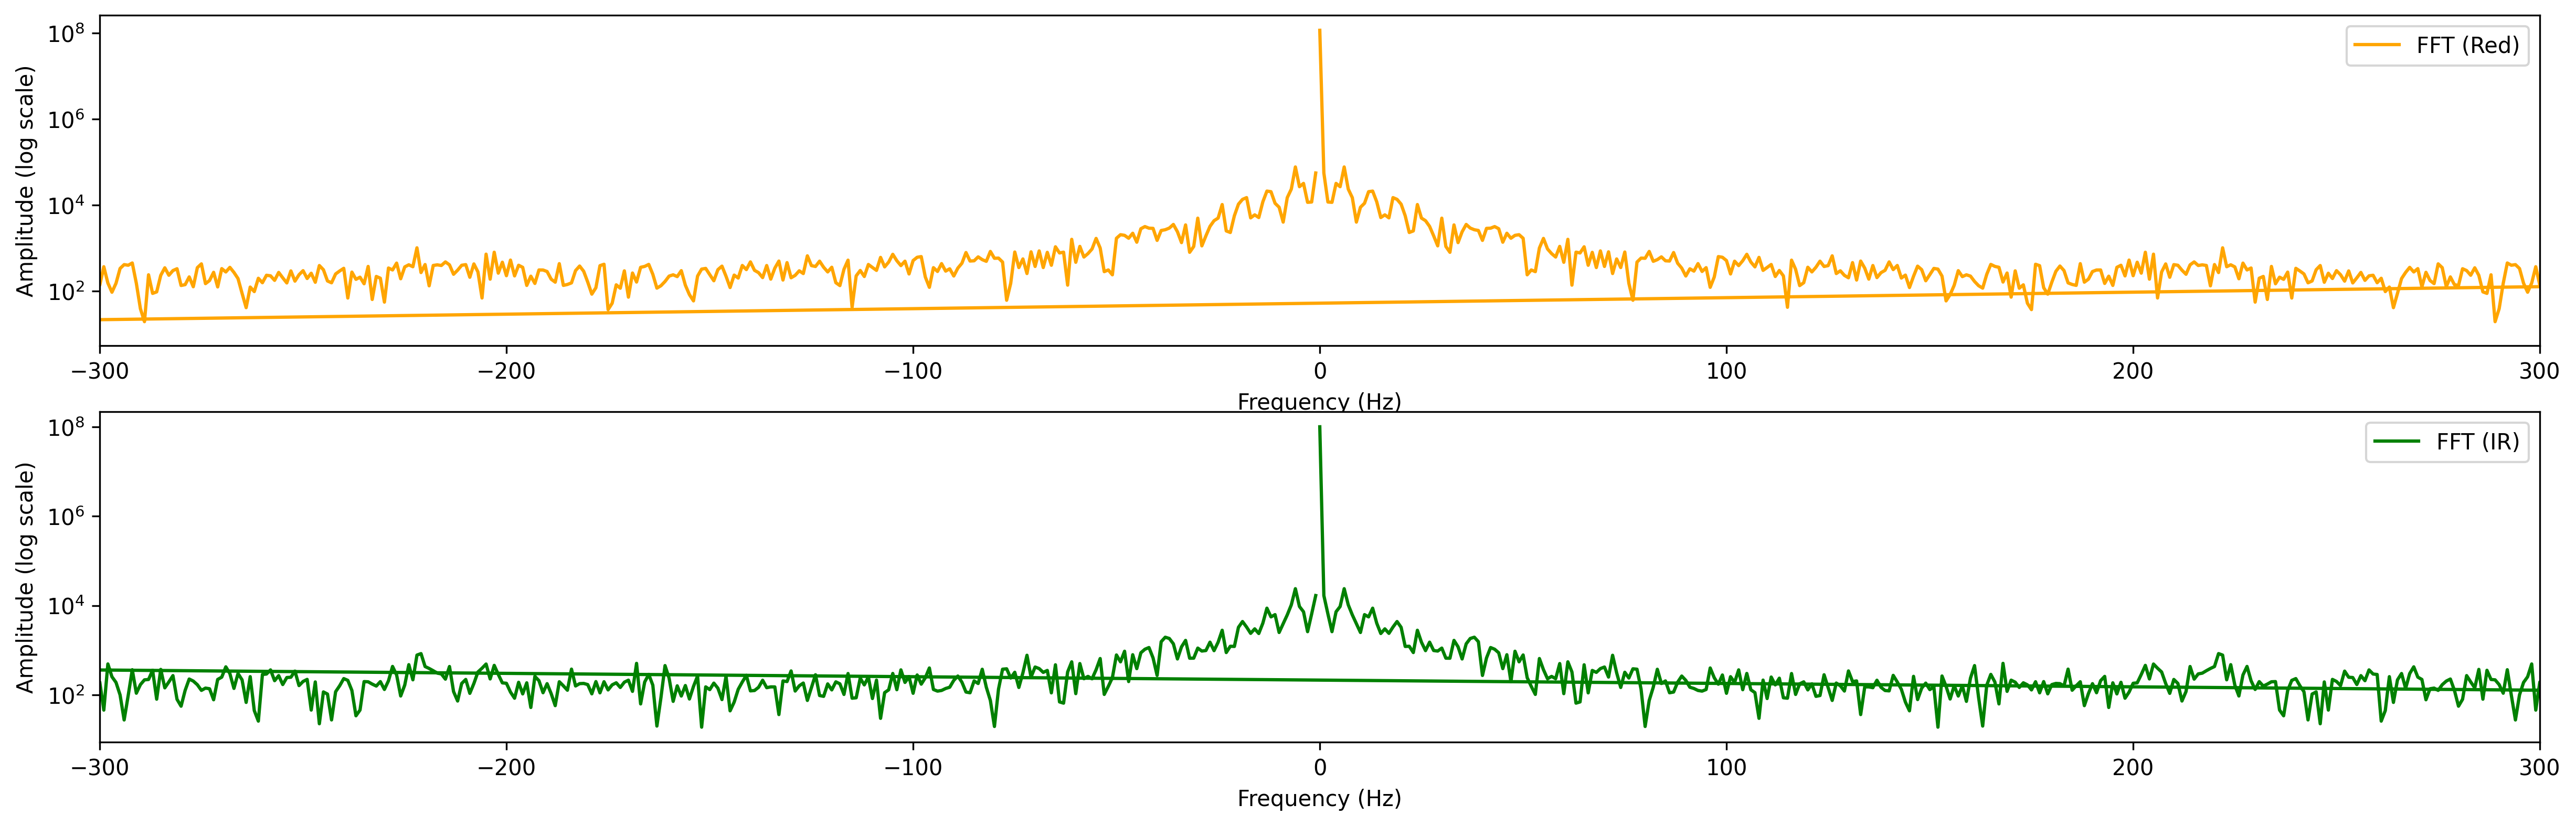

In [1]:
# open file
import os

dir_name = %pwd

# import libs
import matplotlib
import os.path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.gridspec as gridspec

# open file 
from tkinter import filedialog
from tkinter import *

root = Tk()
fname1 = filedialog.askopenfilename(initialdir = dir_name,title = "Select file")
fname1_blank1 = os.path.basename(fname1)
fname1_blank1 = str(fname1).replace(".csv", "")
root.destroy() # get rid of the top-level instance once to make it actually invisible

# Load data
data_array = np.genfromtxt(fname1, delimiter=',', skip_footer=0, skip_header=0)
data = [data_array[:, 0], data_array[:, 1]]

# Create figure for raw images
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for RAW PPG (Red)
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(data[0], color='red', label="RAW PPG (Red)")
plt.legend()

# Second subplot for RAW PPG (IR)
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(data[1], color='blue', label="RAW PPG (IR)")
plt.legend()

plt.show()

# Compute FFT for both signals
fft_red = np.fft.fft(data[0])
fft_ir = np.fft.fft(data[1])

# Compute the corresponding frequencies
N = len(data[0])  # Assuming both signals have the same length
frequencies = np.fft.fftfreq(N, d = 1/N)


# Create figure to show fft
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

raw_fft_x_limit = 300

# Third subplot for FFT of Red signal
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_red), color='orange', label="FFT (Red)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

# Fourth subplot for FFT of IR signal
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_ir), color='green', label="FFT (IR)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

plt.show()


## Smooth the raw data

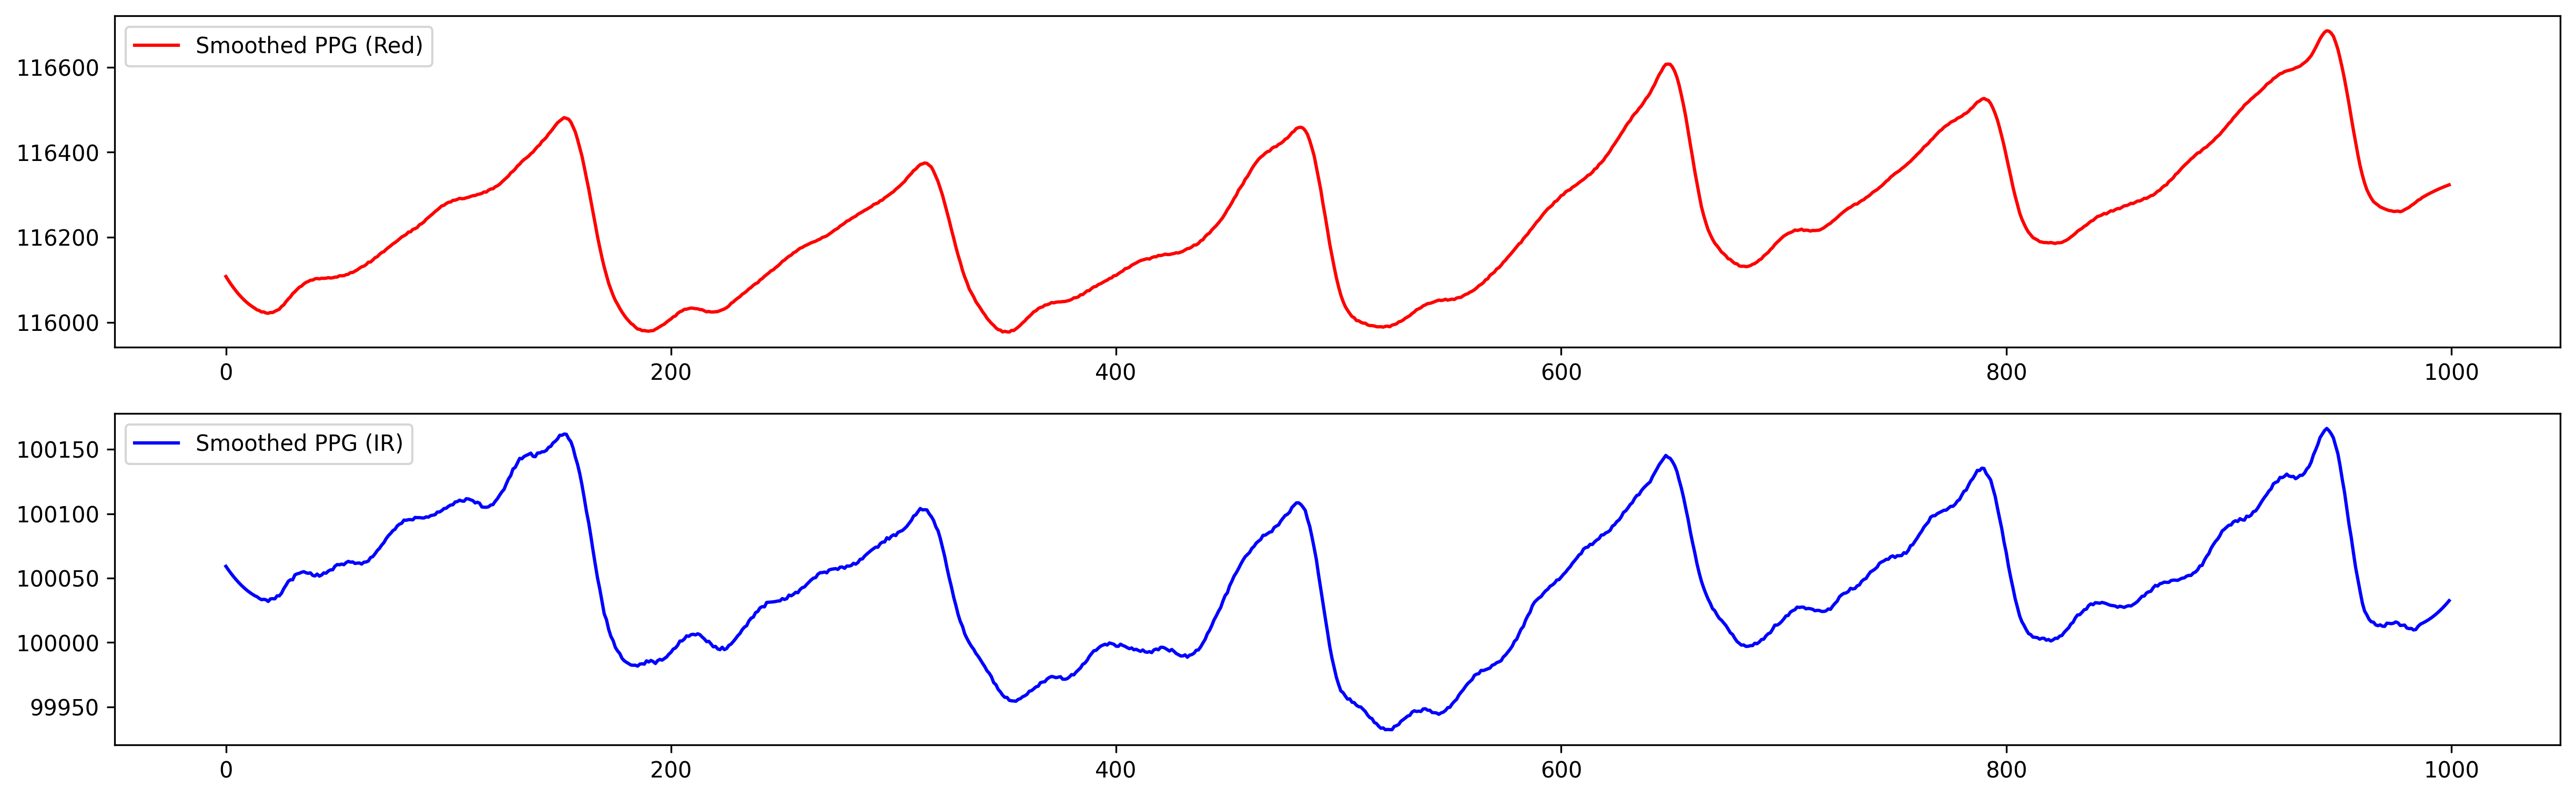

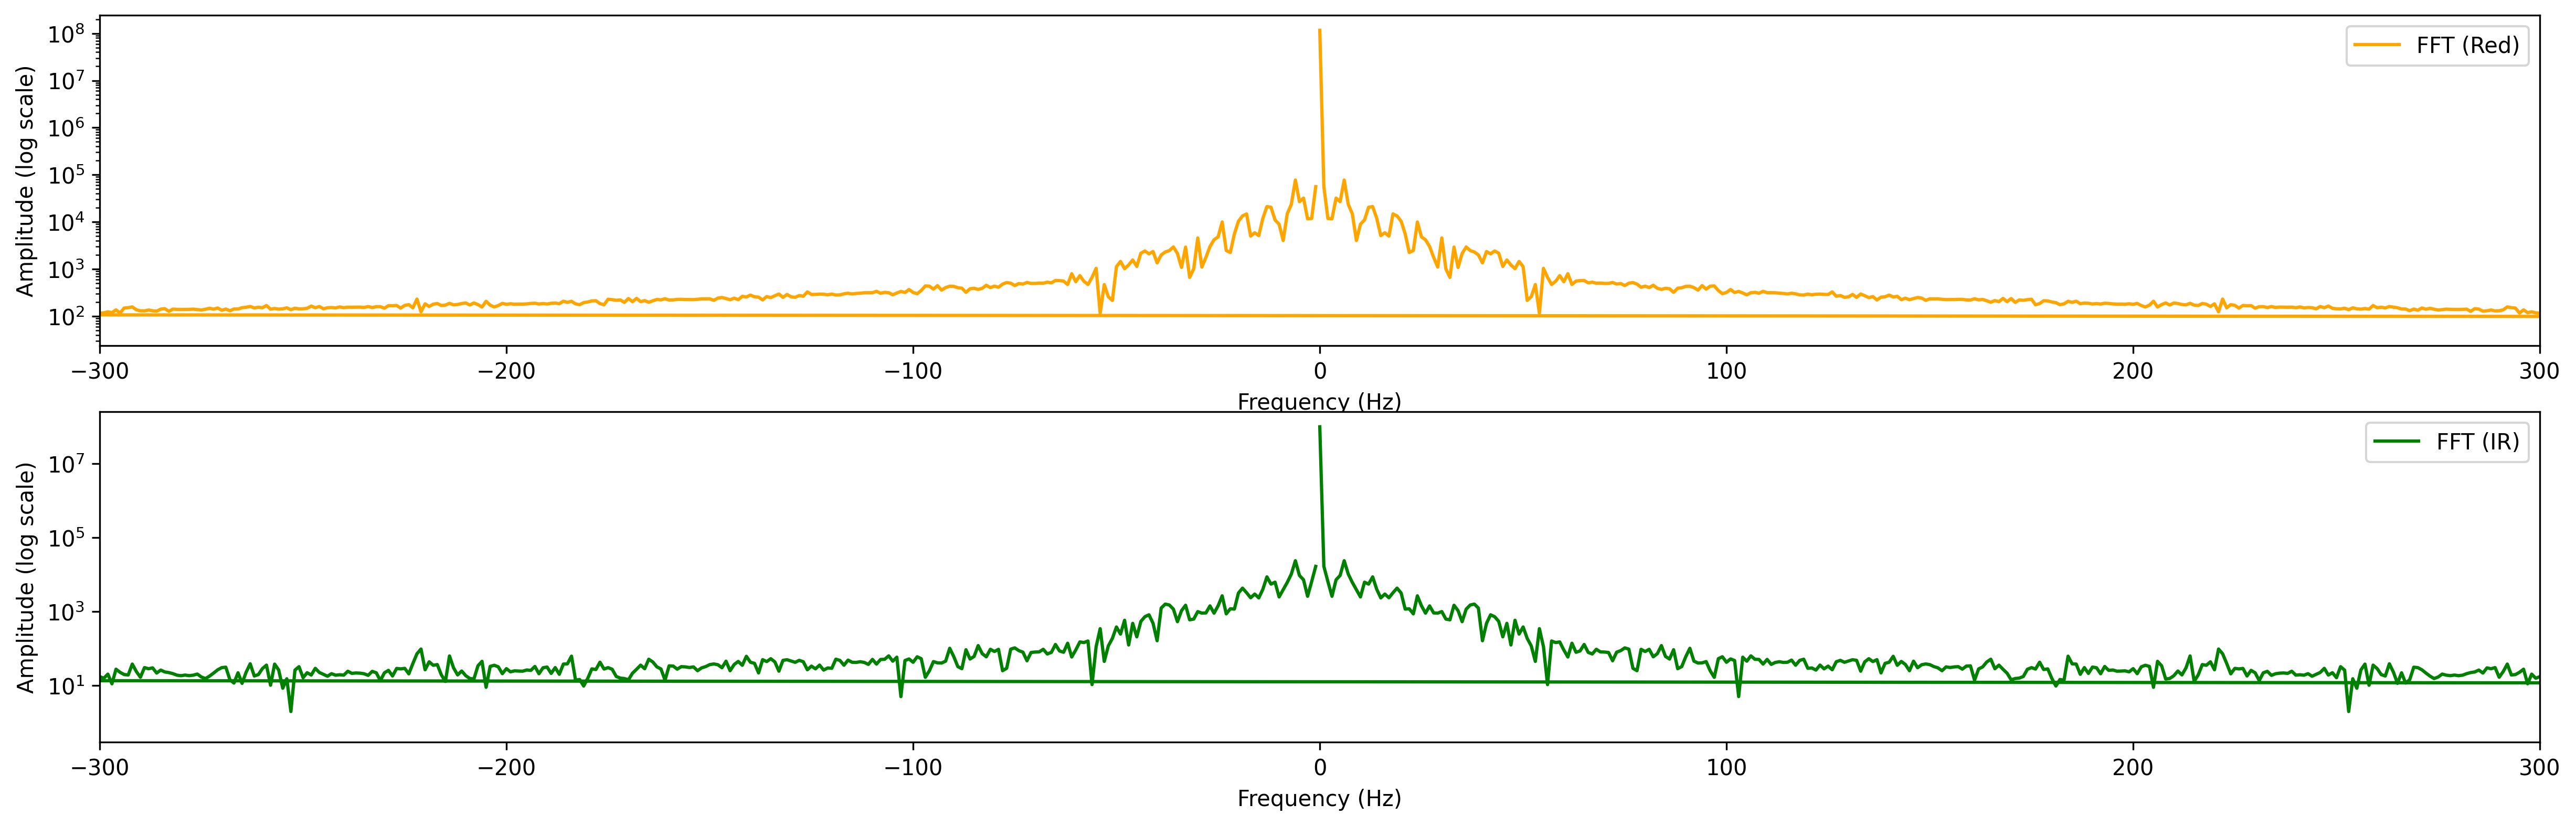

In [2]:
from scipy.signal import savgol_filter

# Smooth the data using Savitzky-Golay filter with a window size of 11 and polynomial order 2
smooth_data_red = savgol_filter(data[0], window_length=25, polyorder=2)
smooth_data_ir = savgol_filter(data[1], window_length=25, polyorder=2)

# Create figure
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for smoothed RAW PPG (Red)
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(smooth_data_red, color='red', label="Smoothed PPG (Red)")
plt.legend()

# Second subplot for smoothed RAW PPG (IR)
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(smooth_data_ir, color='blue', label="Smoothed PPG (IR)")
plt.legend()

# Show the figure
plt.show()

# Compute FFT for both signals
fft_red = np.fft.fft(smooth_data_red)
fft_ir = np.fft.fft(smooth_data_ir)

# Compute the corresponding frequencies
N = len(smooth_data_red)  # Assuming both signals have the same length
frequencies = np.fft.fftfreq(N, d = (1/N))

# Create figure to show fft
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# Third subplot for FFT of Red signal
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_red), color='orange', label="FFT (Red)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

# Fourth subplot for FFT of IR signal
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_ir), color='green', label="FFT (IR)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.legend()
plt.yscale('log')

plt.show()

## Remove the base line drift

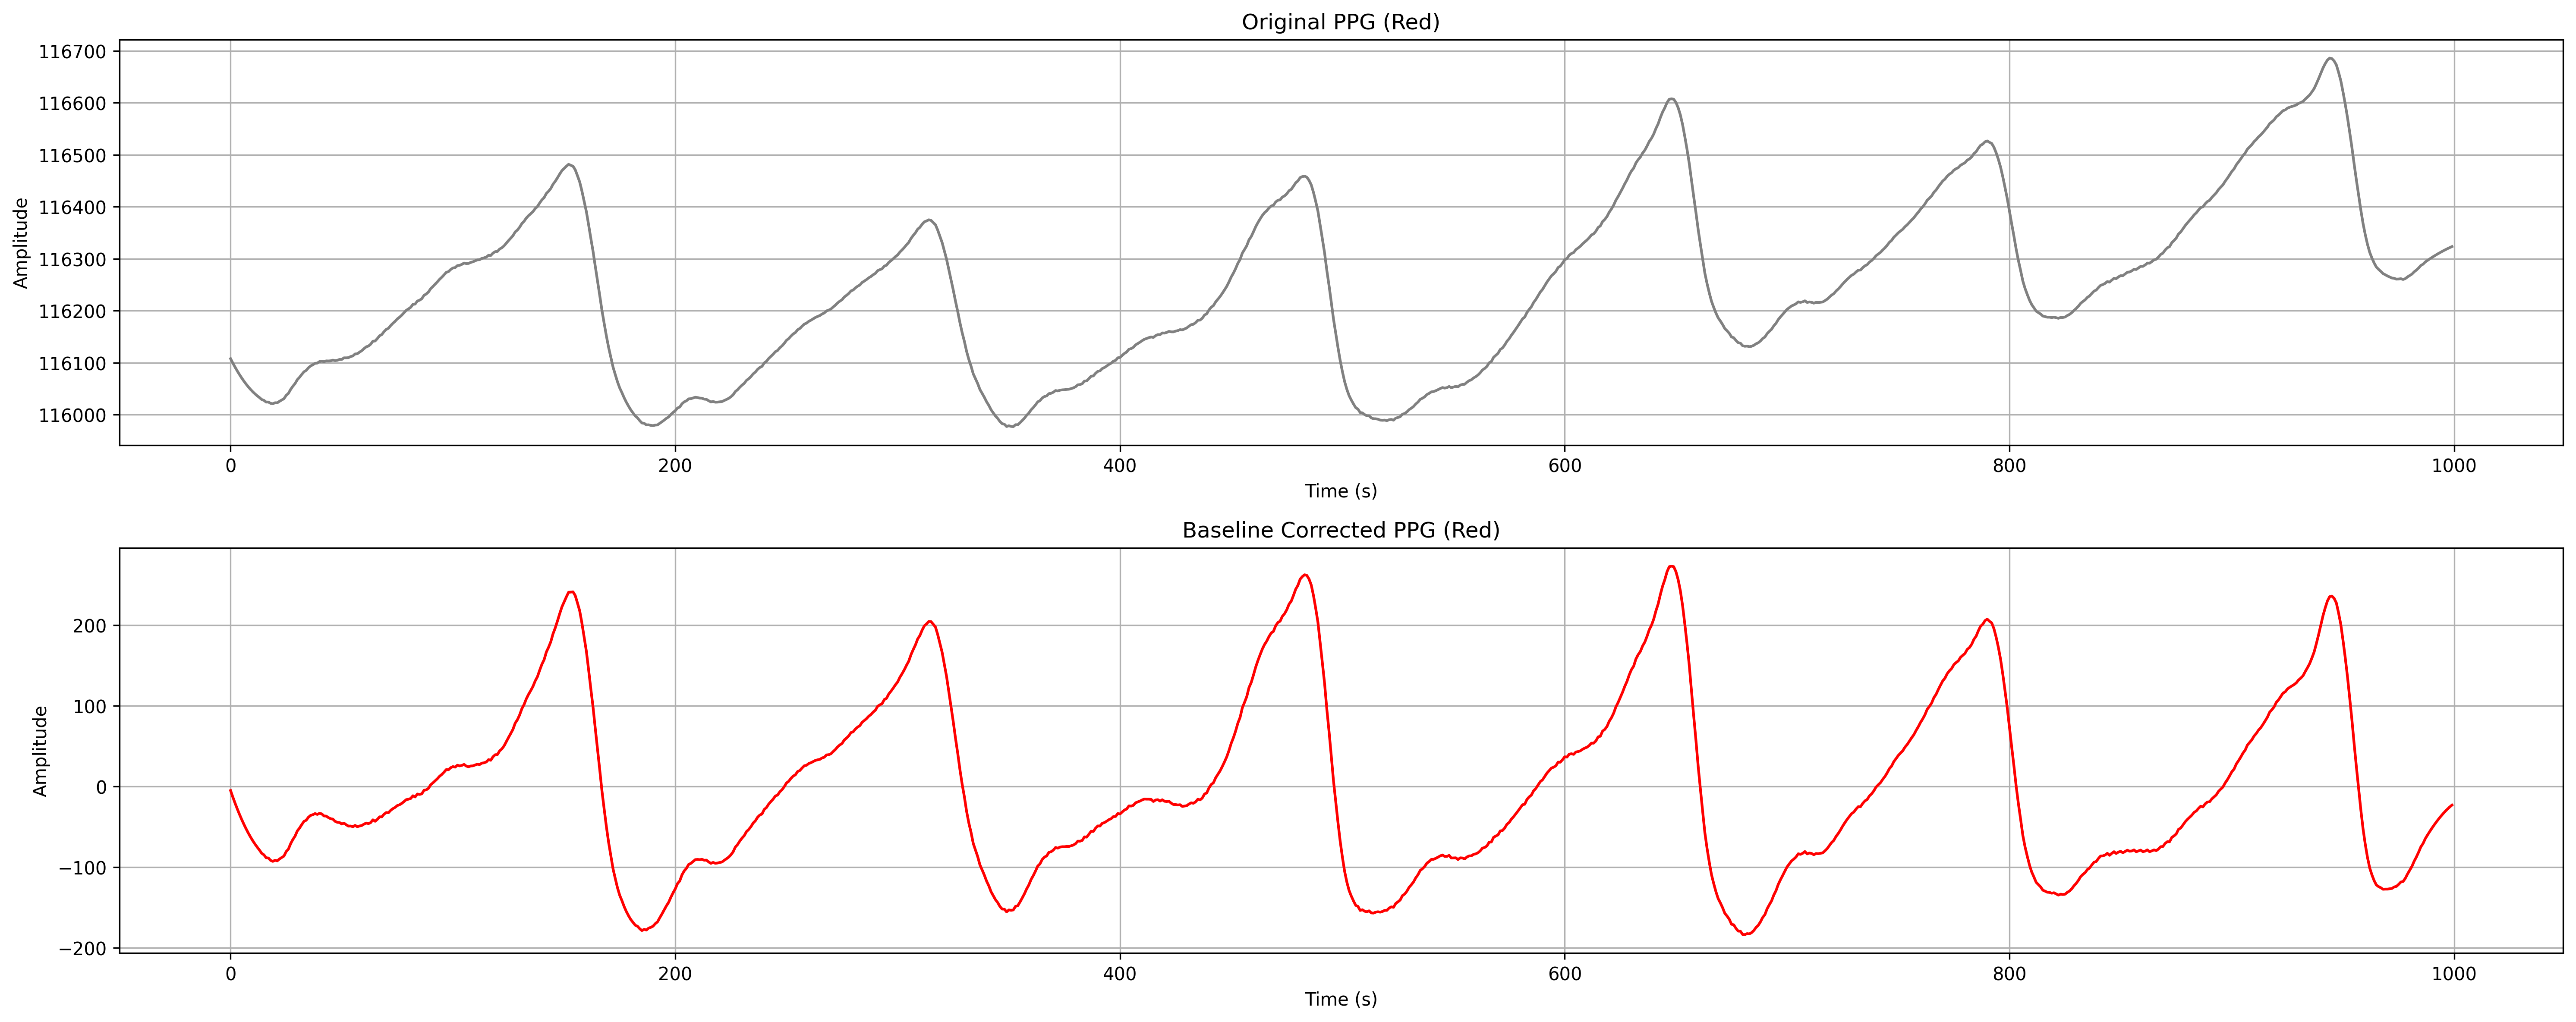

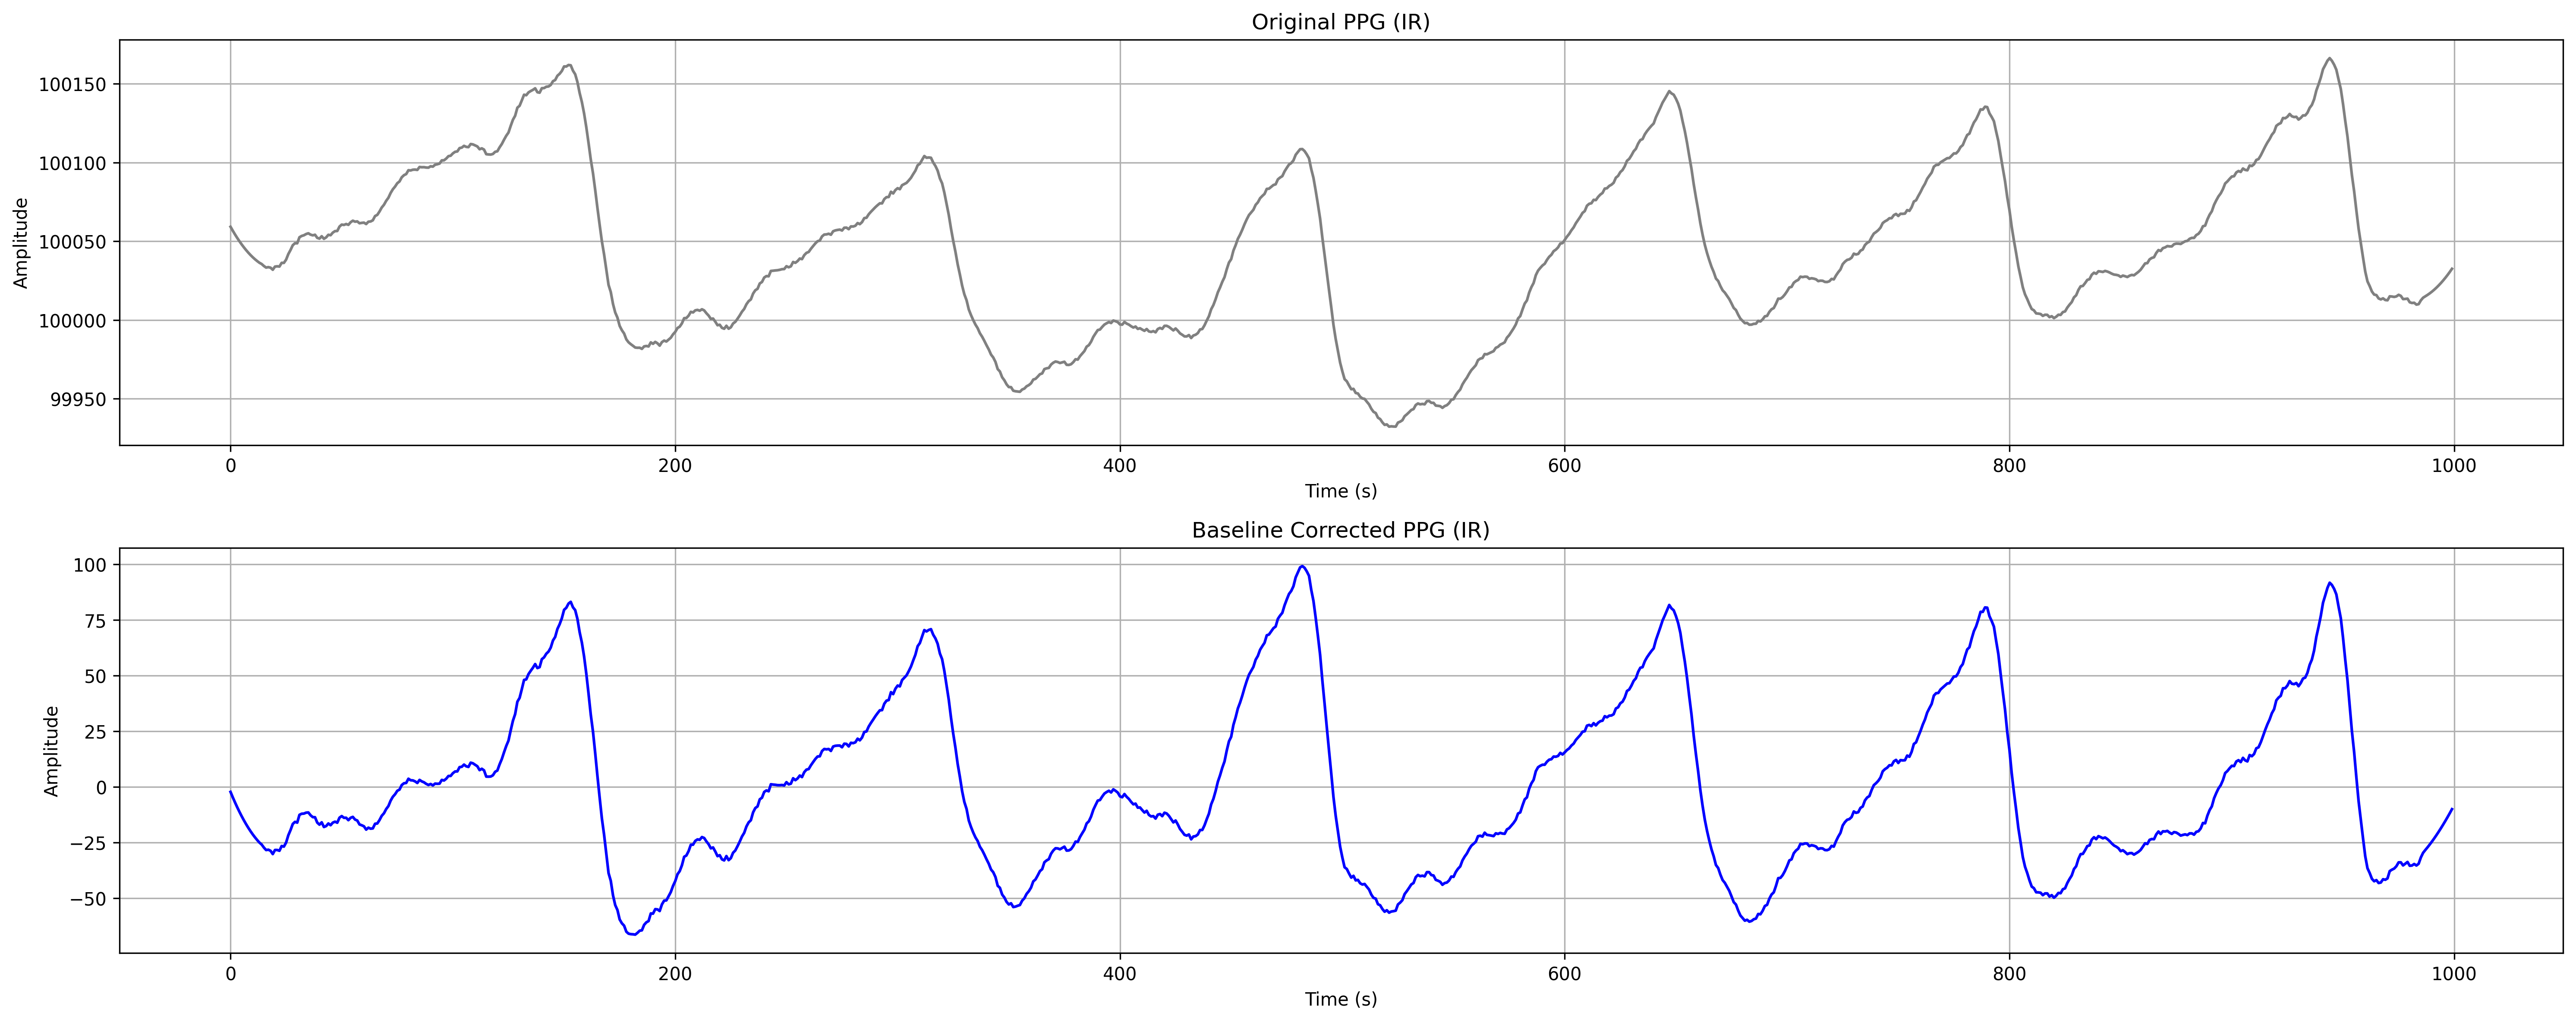

In [3]:
from scipy.signal import butter, filtfilt

# Define a high-pass filter
def highpass_filter(data, cutoff=0.5, fs=100, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the high-pass filter to remove baseline drift
fs = 100  # Sampling frequency (adjust based on your data)
cutoff = 0.5  # Cutoff frequency to remove drift (in Hz)
filtered_data_red = highpass_filter(smooth_data_red, cutoff, fs)
filtered_data_ir = highpass_filter(smooth_data_ir, cutoff, fs)

plt.figure(figsize=(20, 8), dpi=300)
# Top-left: Original Red PPG
plt.subplot(2, 1, 1)  # (number of rows, number of columns, index)
plt.plot(smooth_data_red, color='gray')
plt.title("Original PPG (Red)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Bottom-left: Baseline Corrected Red PPG
plt.subplot(2, 1, 2)  # (number of rows, number of columns, index)
plt.plot(filtered_data_red, color='red')
plt.title("Baseline Corrected PPG (Red)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 8), dpi=300)
# Top-right: Original IR PPG
plt.subplot(2, 1, 1)  # (number of rows, number of columns, index)
plt.plot(smooth_data_ir, color='gray')
plt.title("Original PPG (IR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Bottom-right: Baseline Corrected IR PPG
plt.subplot(2, 1, 2)  # (number of rows, number of columns, index)
plt.plot(filtered_data_ir, color='blue')
plt.title("Baseline Corrected PPG (IR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## Find global high and low peaks and heart rate

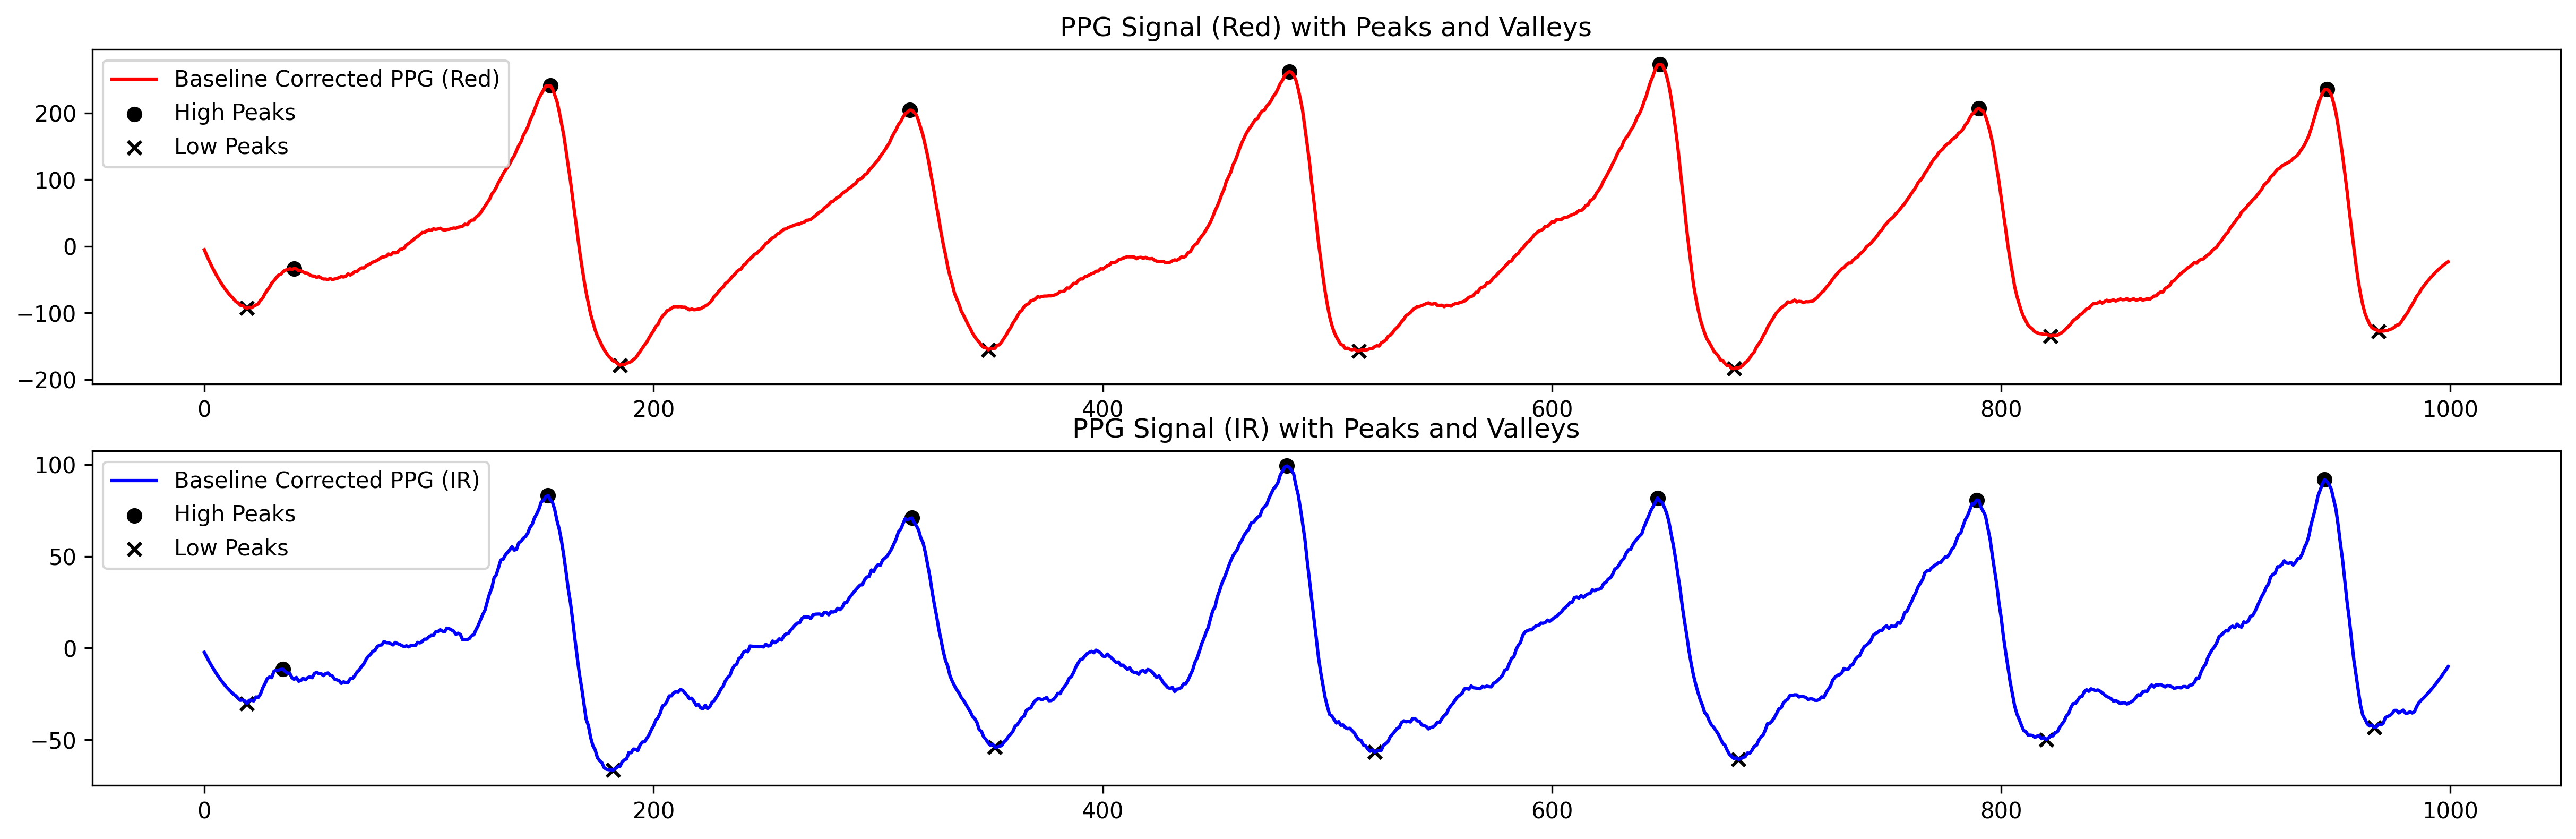

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data_red = filtered_data_red
data_ir = filtered_data_ir

peaks_distance = 100

# Find high peaks (local maxima)
peaks_red, _ = find_peaks(data_red, distance=peaks_distance)  # Adjust 'distance' as per your signal
peaks_ir, _ = find_peaks(data_ir, distance=peaks_distance)

# Find low peaks (local minima) by inverting the signal
valleys_red, _ = find_peaks(-data_red, distance=peaks_distance)
valleys_ir, _ = find_peaks(-data_ir, distance=peaks_distance)

# Create figure
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for Red PPG signal
plt.subplot(2, 1, 1)
plt.plot(data_red, color='red', label="Baseline Corrected PPG (Red)")
plt.scatter(peaks_red, data_red[peaks_red], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_red, data_red[valleys_red], marker='x', color='black', label='Low Peaks')  # Mark low peaks
plt.legend()
plt.title("PPG Signal (Red) with Peaks and Valleys")

# Second subplot for IR PPG signal
plt.subplot(2, 1, 2)
plt.plot(data_ir, color='blue', label="Baseline Corrected PPG (IR)")
plt.scatter(peaks_ir, data_ir[peaks_ir], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_ir, data_ir[valleys_ir], marker='x', color='black', label='Low Peaks')  # Mark low peaks
plt.legend()
plt.title("PPG Signal (IR) with Peaks and Valleys")

# Show the figure
plt.show()


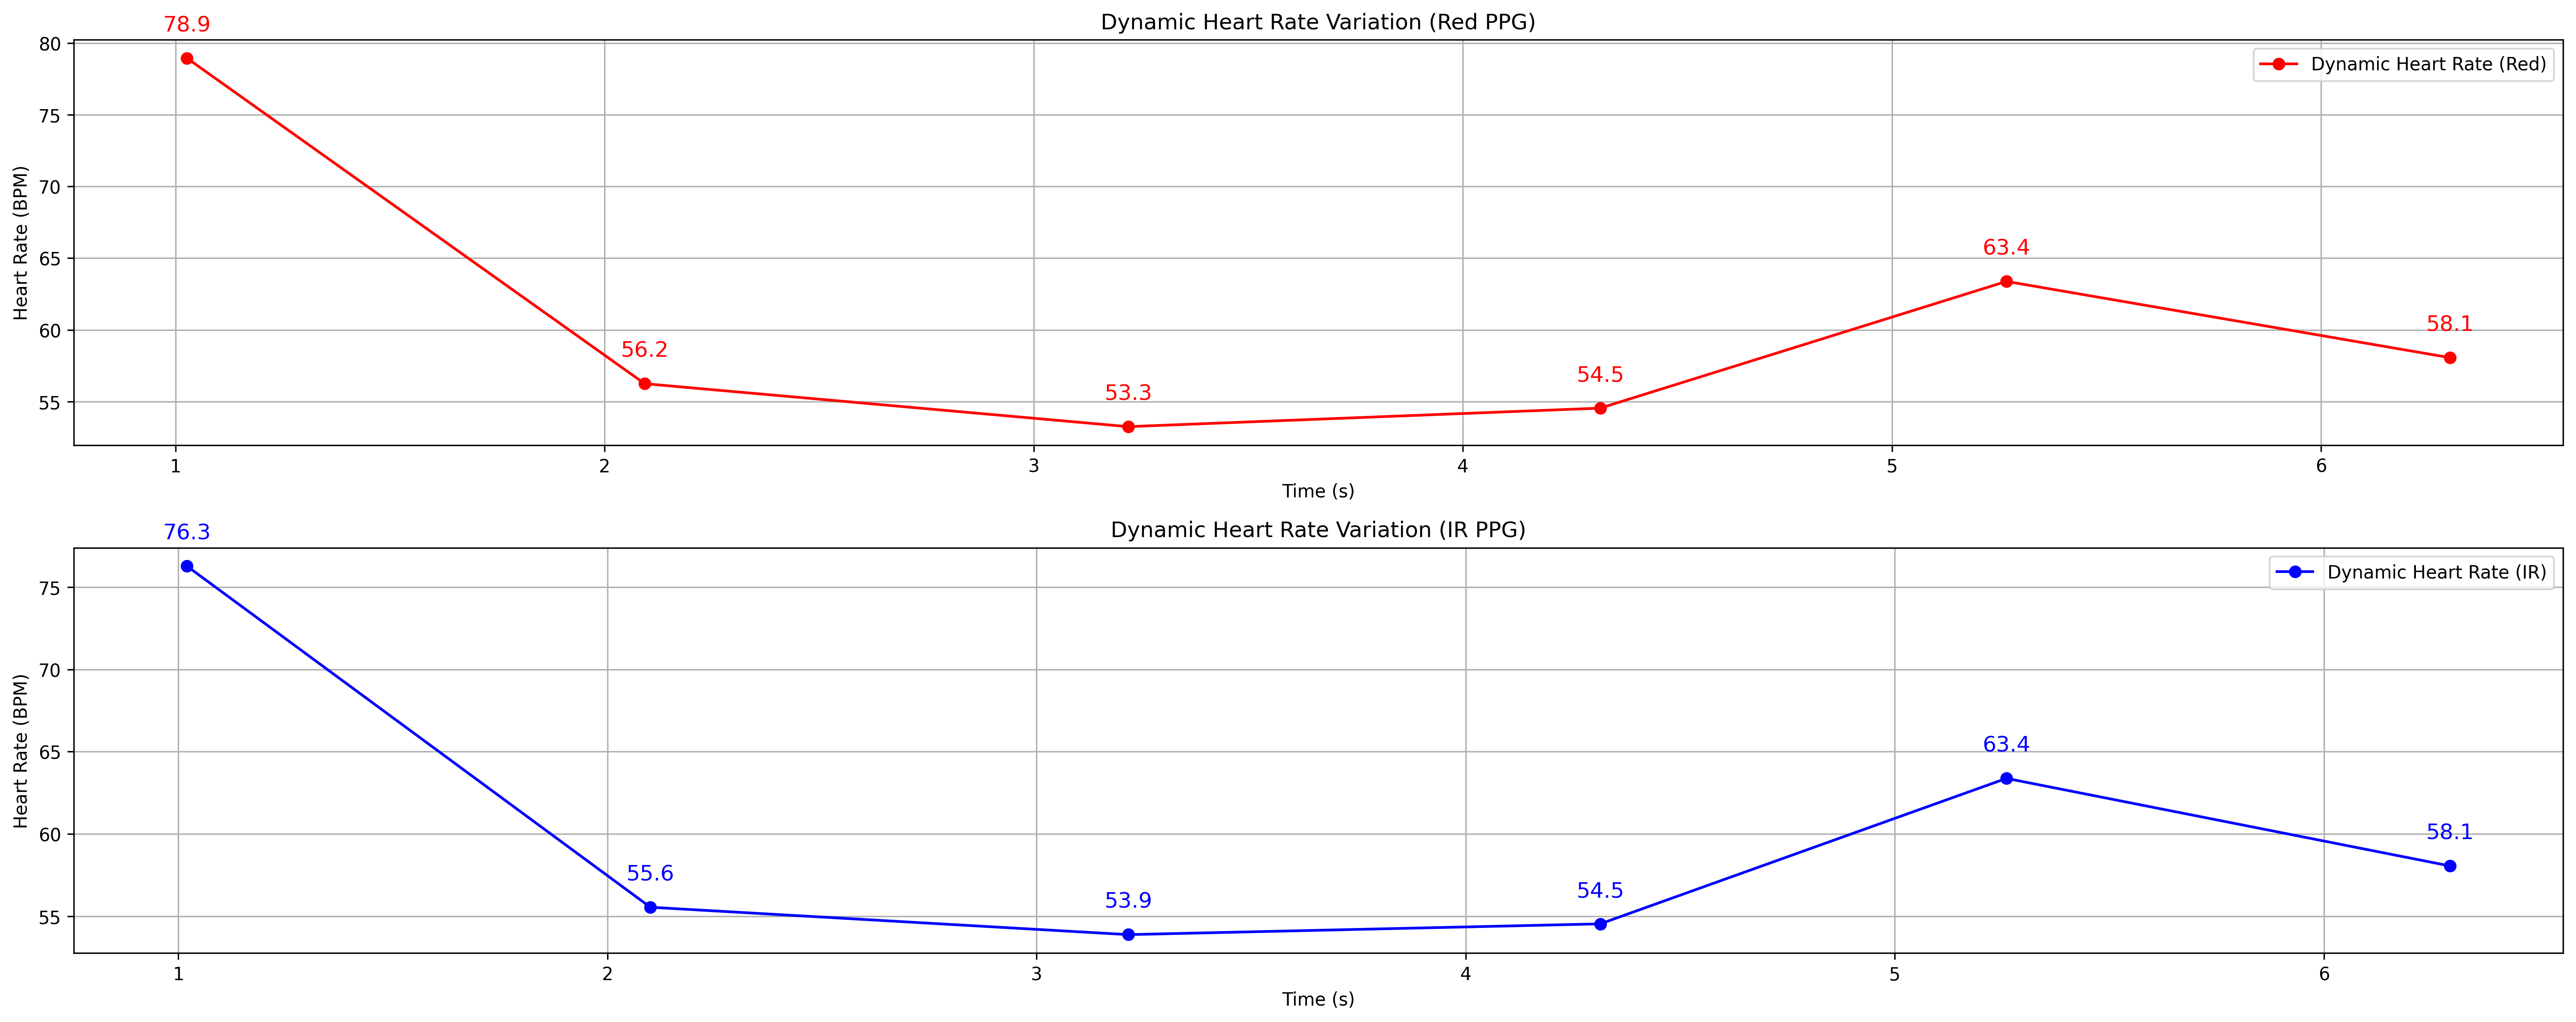

In [5]:
sampling_rate = 150

# Function to calculate dynamic heart rate from detected peaks
def calculate_dynamic_heart_rate(peaks, sampling_rate):
    if len(peaks) < 2:
        return [], []  # Not enough peaks to calculate heart rate
    peak_intervals = np.diff(peaks) / sampling_rate  # Time between consecutive peaks in seconds
    dynamic_heart_rate = 60 / peak_intervals  # Convert to beats per minute (BPM)
    time_axis = peaks[1:] / sampling_rate  # Time points corresponding to the calculated heart rates
    return time_axis, dynamic_heart_rate

# Calculate dynamic heart rate for Red and IR signals
time_axis_red, dynamic_hr_red = calculate_dynamic_heart_rate(peaks_red, sampling_rate)
time_axis_ir, dynamic_hr_ir = calculate_dynamic_heart_rate(peaks_ir, sampling_rate)

plt.figure(figsize=(20, 8), dpi=300, facecolor='w', edgecolor='w')

# Plot for dynamic heart rate from Red signal
plt.subplot(2, 1, 1) 
plt.plot(time_axis_red, dynamic_hr_red, marker='o', color='red', linestyle='-', label='Dynamic Heart Rate (Red)')
plt.title("Dynamic Heart Rate Variation (Red PPG)")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (BPM)")
plt.legend()
plt.grid(True)

for i in range(len(dynamic_hr_red)):
    plt.annotate(f"{dynamic_hr_red[i]:.1f}", 
                 (time_axis_red[i], dynamic_hr_red[i]), 
                 textcoords="offset points", 
                 xytext=(0, 15),  
                 ha='center', 
                 fontsize=12, 
                 color='red')

# Plot for dynamic heart rate from IR signal
plt.subplot(2, 1, 2)
plt.plot(time_axis_ir, dynamic_hr_ir, marker='o', color='blue', linestyle='-', label='Dynamic Heart Rate (IR)')
plt.title("Dynamic Heart Rate Variation (IR PPG)")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (BPM)")
plt.legend()
plt.grid(True)

for i in range(len(dynamic_hr_ir)):
    plt.annotate(f"{dynamic_hr_ir[i]:.1f}", 
                 (time_axis_ir[i], dynamic_hr_ir[i]), 
                 textcoords="offset points", 
                 xytext=(0, 15),
                 ha='center', 
                 fontsize=12,
                 color='blue')

# Show the plots
plt.tight_layout()
plt.show()


## FFT

play with the `num_waves` variable to see the construction of square wave from sinusoidal waves

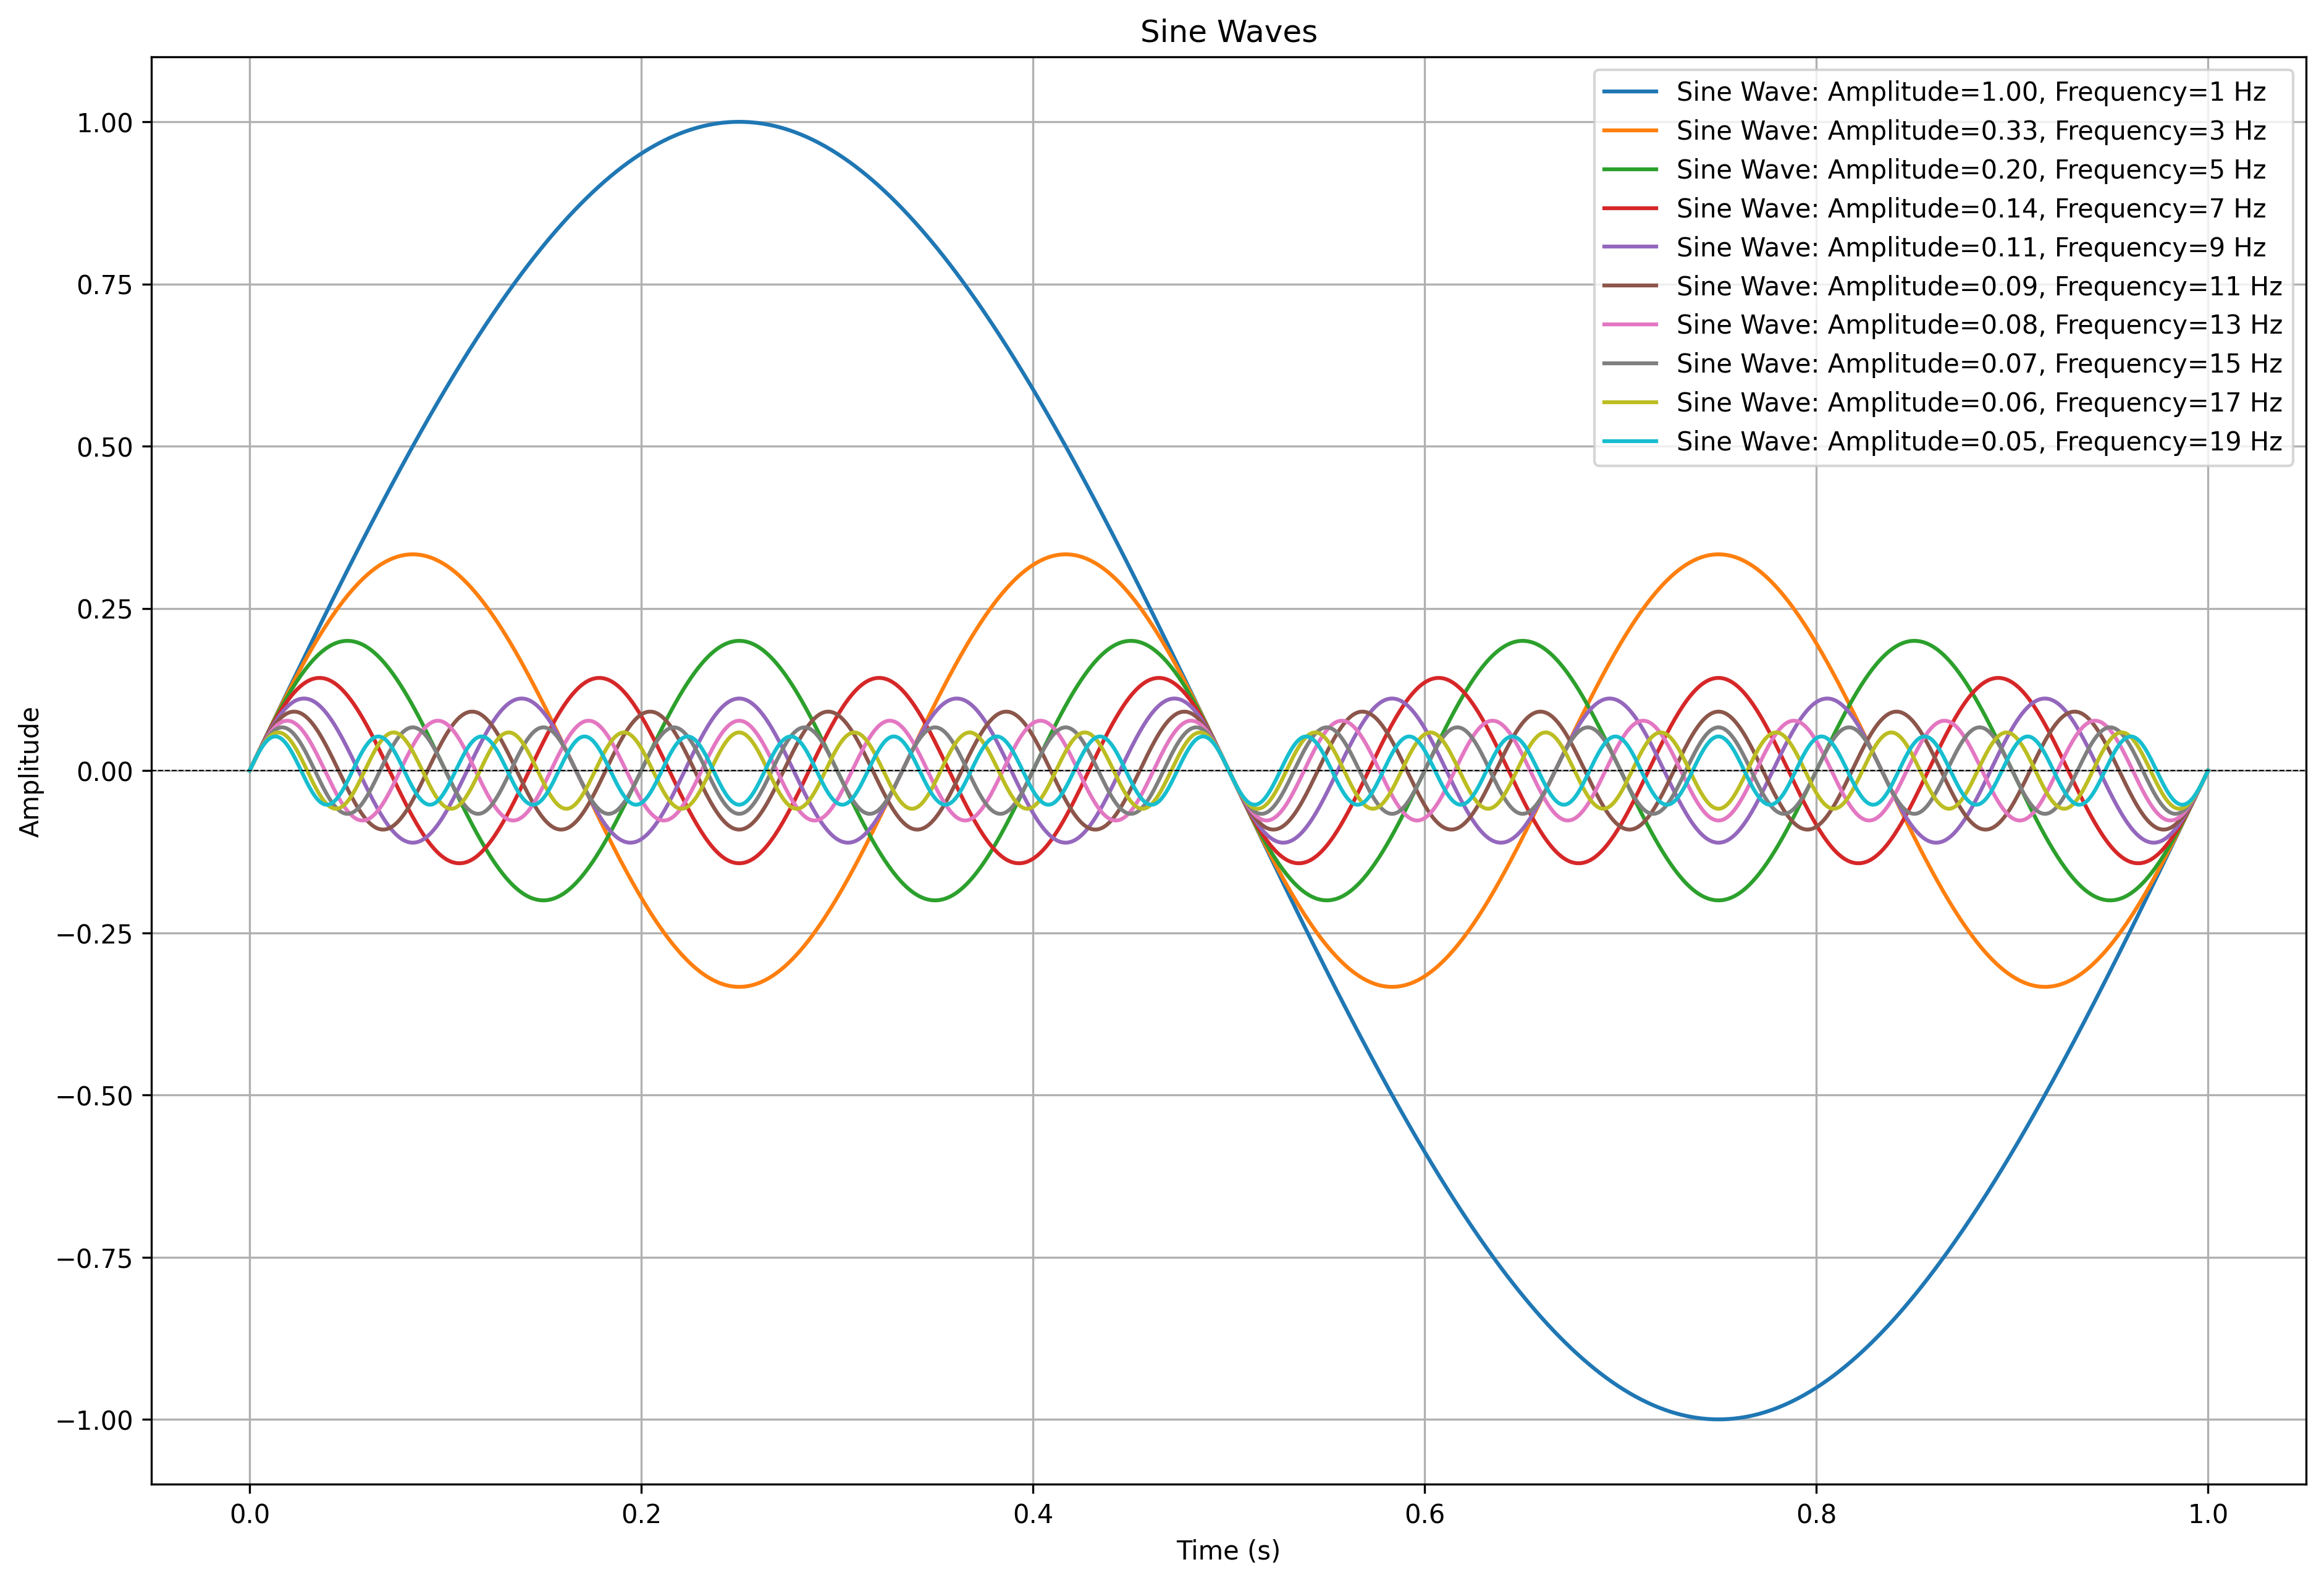

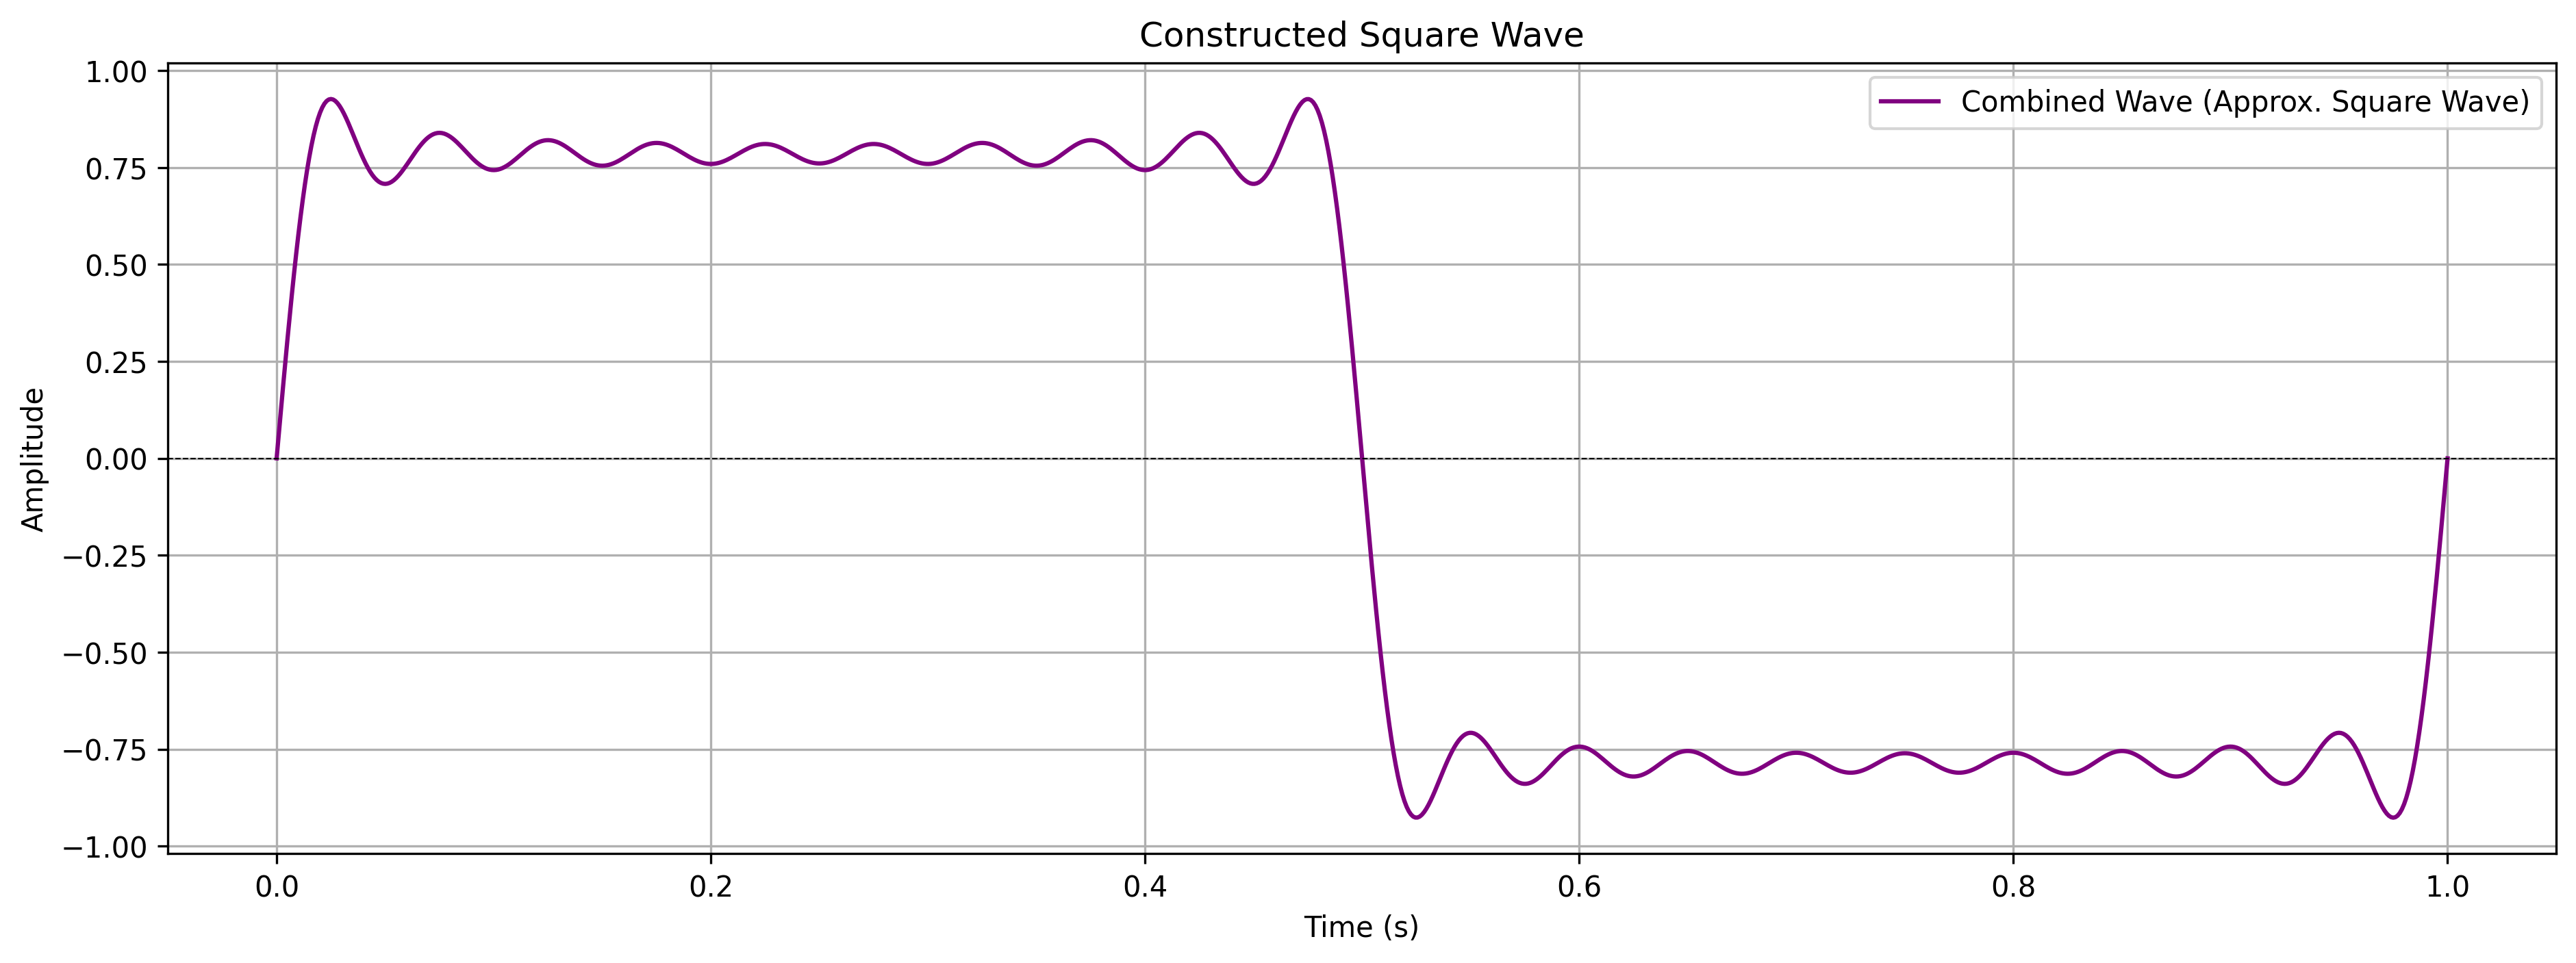

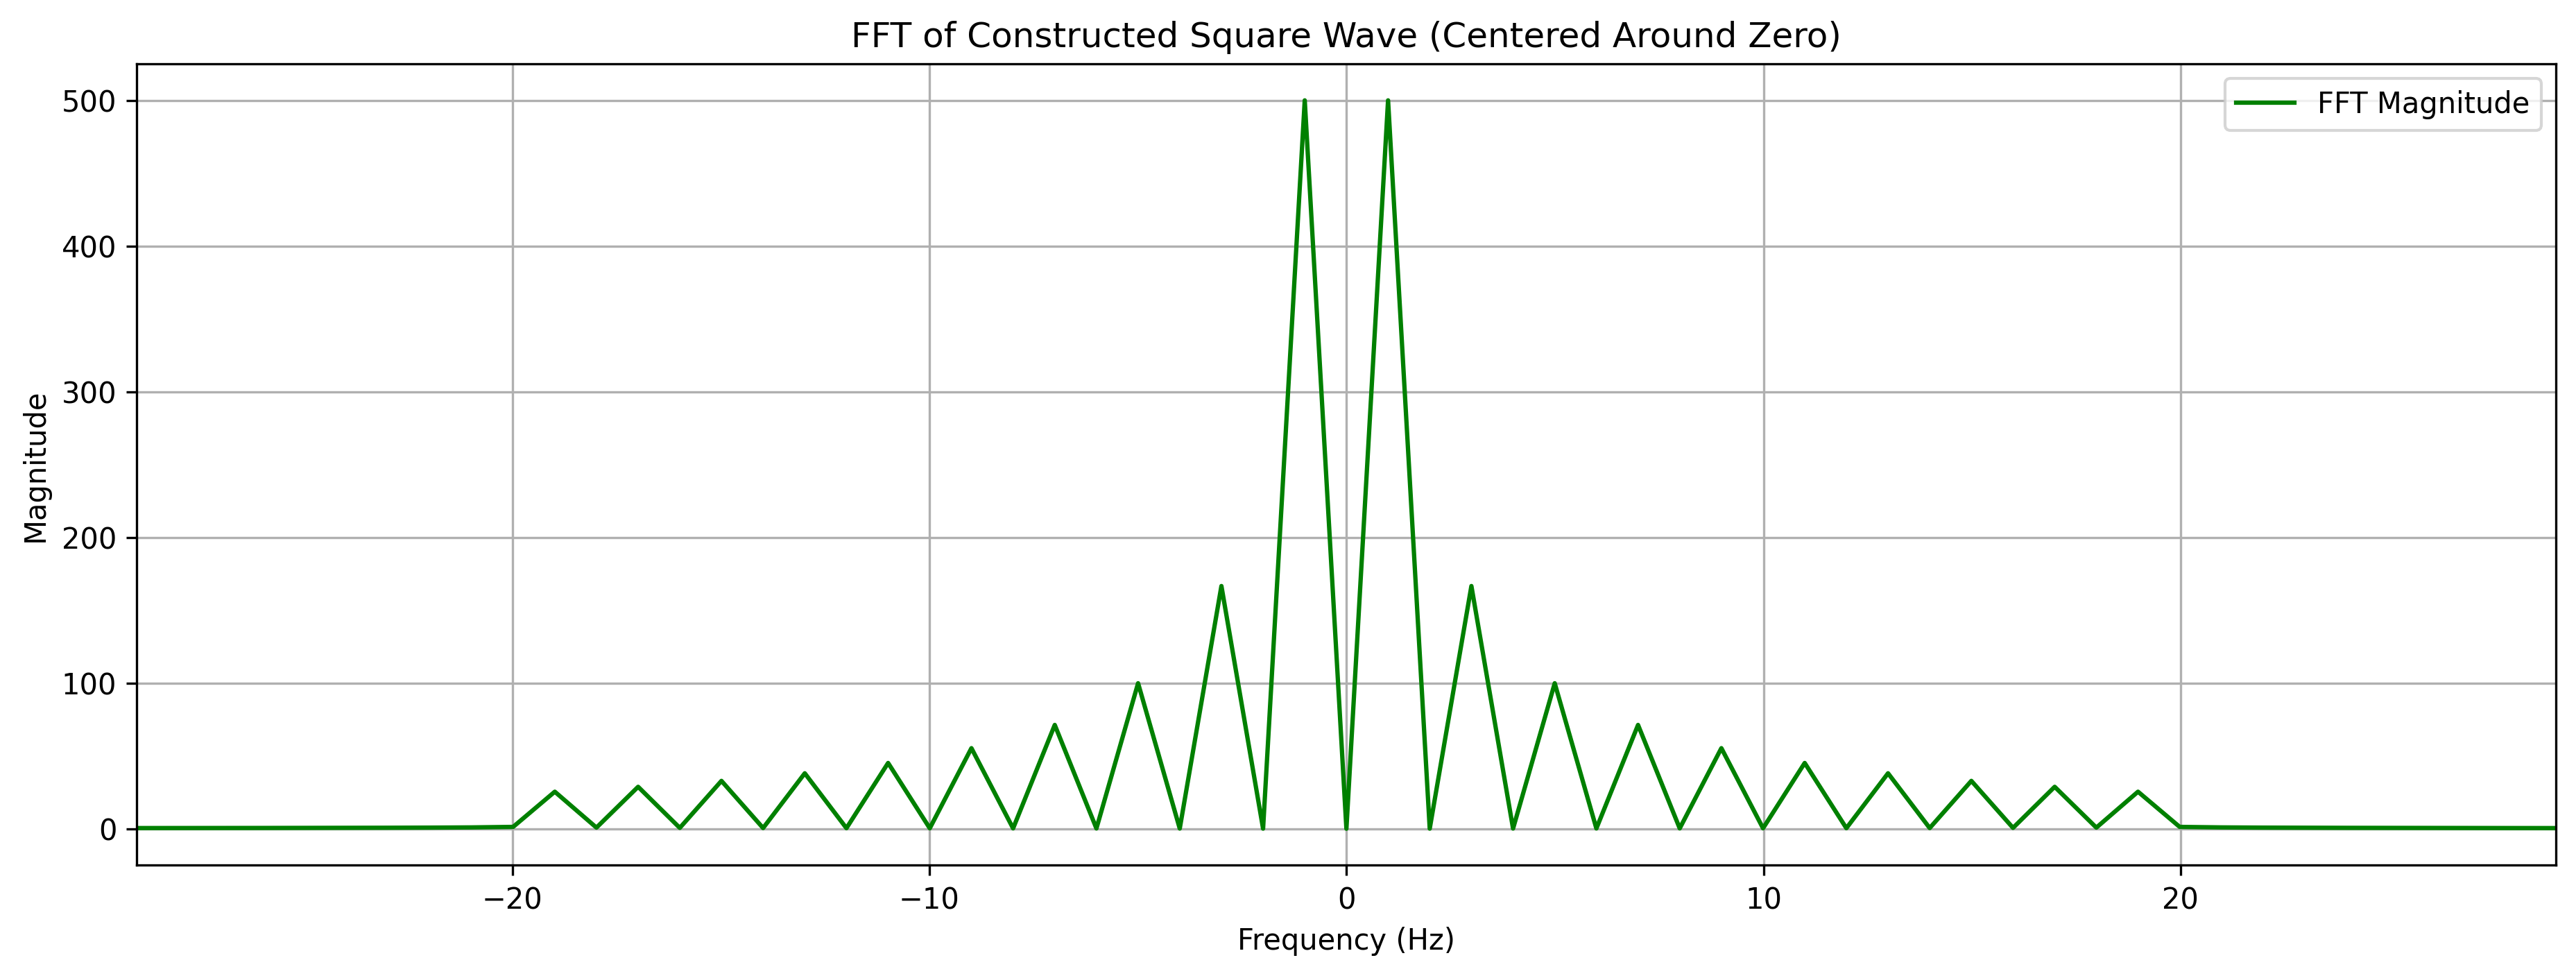

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Variable to set the number of sine waves
num_waves = 10  # Change this value to add more sine waves

# Parameters for the sine waves
frequencies = [1 + 2 * i for i in range(num_waves)]  # Odd frequencies: 1, 3, 5, ...
amplitudes = [1 / (2 * i + 1) for i in range(num_waves)]  # Amplitudes: 1, 0.5, 0.33, ...

t = np.linspace(0, 1, 1000)  # Time array

# Initialize the figure
plt.figure(figsize=(15, 10), dpi=300)

# Plot all sine waves on the same plot
for i in range(num_waves):
    sine_wave = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)  # Create the sine wave
    plt.plot(t, sine_wave, label=f'Sine Wave: Amplitude={amplitudes[i]:.2f}, Frequency={frequencies[i]} Hz')

plt.title('Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add x-axis line
plt.legend()
plt.grid(True)
plt.show()

# Construct the combined wave
combined_wave = np.zeros_like(t)

for i in range(num_waves):
    combined_wave += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)  # Add sine wave to combined wave

# Plot the fully constructed square wave
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(t, combined_wave, label='Combined Wave (Approx. Square Wave)', color='purple')
plt.title('Constructed Square Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add x-axis line
plt.legend()
plt.grid(True)
plt.show()


# Compute the FFT of the constructed square wave
fft_values = np.fft.fft(combined_wave)  # FFT computation
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])  # Frequency array for FFT

# Shift the FFT to center zero frequency
fft_values_shifted = np.fft.fftshift(fft_values)  # Shift FFT values
fft_freq_shifted = np.fft.fftshift(fft_freq)      # Shift FFT frequencies

# Compute magnitudes
fft_magnitude = np.abs(fft_values_shifted)

# Plot the FFT of the constructed square wave centered around zero
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(fft_freq_shifted, fft_magnitude, label='FFT Magnitude', color='green')
plt.title('FFT of Constructed Square Wave (Centered Around Zero)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-frequencies[-1]-10, frequencies[-1]+10)
plt.legend()
plt.grid(True)
plt.show()


## Lets Apply FFT of the PPG signal

<class 'numpy.ndarray'>


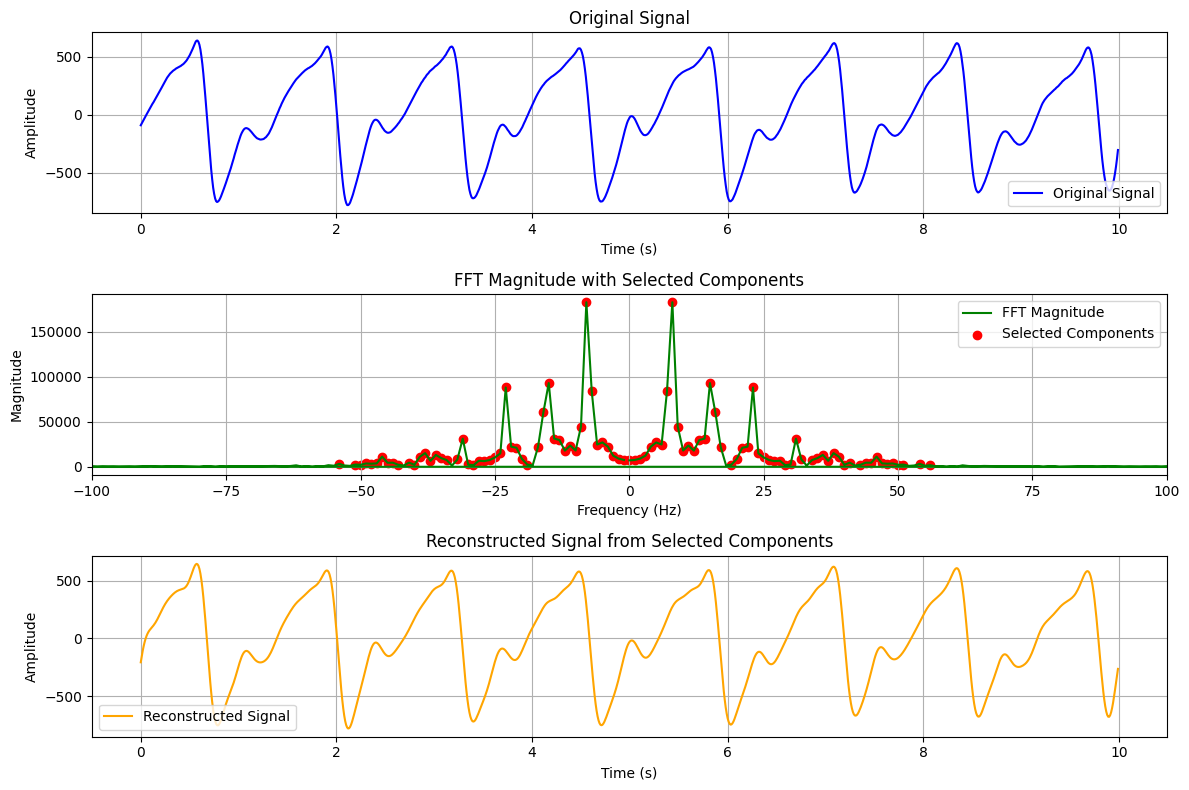

In [47]:
# User-defined number of frequency components to keep
num_components = 100  # You can change this value

fs = 1000
t = 10*np.linspace(0, 1, fs, endpoint=False)  # Time vector
v = filtered_data_red  # Original signal

print(type(v))

# Apply FFT
N = len(v)
V_fft = np.fft.fft(v)

# Frequency axis
frequencies = np.fft.fftfreq(N, d=(1/fs))

# Create a copy of V_fft to zero out components not in the top 'num_components'
V_fft_reduced = np.zeros(N, dtype=complex)

# Select the top 'num_components' frequency components
indices = np.argsort(np.abs(V_fft))[-num_components:]  # Get indices of top components

# Keep only the selected components
V_fft_reduced[indices] = V_fft[indices]

# Reconstruct the signal using the selected frequency components
v_reconstructed = np.fft.ifft(V_fft_reduced)

plt.figure(figsize=(12, 8))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(t, v, label='Original Signal', color='blue')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot selected frequency components
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(V_fft), label='FFT Magnitude', color='green')
plt.scatter(frequencies[indices], np.abs(V_fft[indices]), color='red', label='Selected Components')
plt.title('FFT Magnitude with Selected Components')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-100, 100)
plt.grid()
plt.legend()

# Plot reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, v_reconstructed.real, label='Reconstructed Signal', color='orange')
plt.title('Reconstructed Signal from Selected Components')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
